Housing California - Ejercicio

#  PASO 1: Carga del conjunto de datos

### Guardar el data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split



In [4]:
#warnings.filterwarnings("ignore")

In [5]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Info y limpieza del data

In [6]:
df.shape

(20640, 9)

In [7]:
print("Conteo de nulos por columna:")
print(df.isnull().sum())


Conteo de nulos por columna:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [8]:
df_dupli = df.duplicated().any()
print(f"¿Existen duplicados? {df_dupli}")


¿Existen duplicados? False


In [9]:
# Mantener solo las columnas requeridas
df = df[['Latitude', 'Longitude', 'MedInc']]
df.head()


,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [10]:
df.to_csv('housing.csv', index=False)
"Archivo 'housing.csv' creado con éxito en el directorio actual."

"Archivo 'housing.csv' creado con éxito en el directorio actual."

### Separación de datos

In [11]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
print("Datos cargados y divididos:")
print(f"Train shape: {train_data.shape}")
print(f"Test shape: {test_data.shape}")

Datos cargados y divididos:
Train shape: (16512, 3)
Test shape: (4128, 3)


# Paso 2: Construye un K-Means

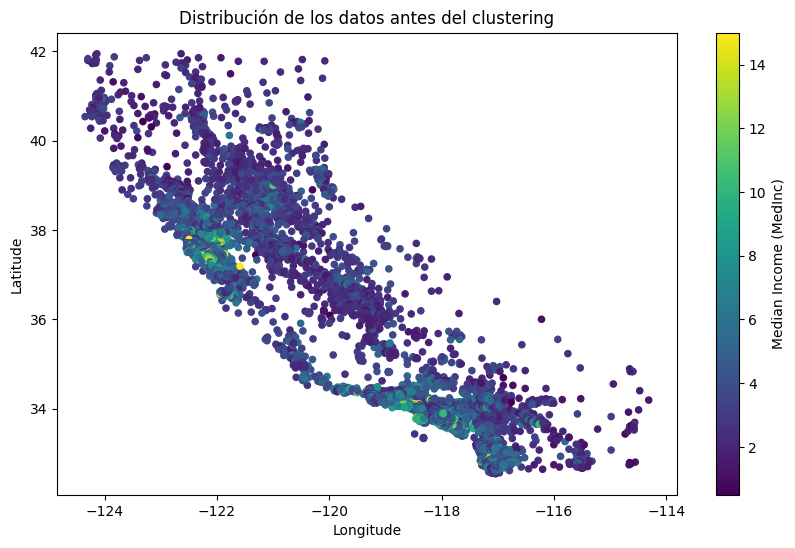

In [13]:
# Visualizar datos antes del clusstering
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['MedInc'], cmap='viridis', s=20) # Viridis va del púrpura (valores bajos) al amarillo (valores altos) en el MedInc #s20 Tamaño puntos
plt.colorbar(label='Median Income (MedInc)')
plt.title("Distribución de los datos antes del clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [14]:
X = train_data[['Latitude', 'Longitude', 'MedInc']]


In [16]:
# Entrenar el modelo
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

In [18]:
X['cluster'] = kmeans.labels_

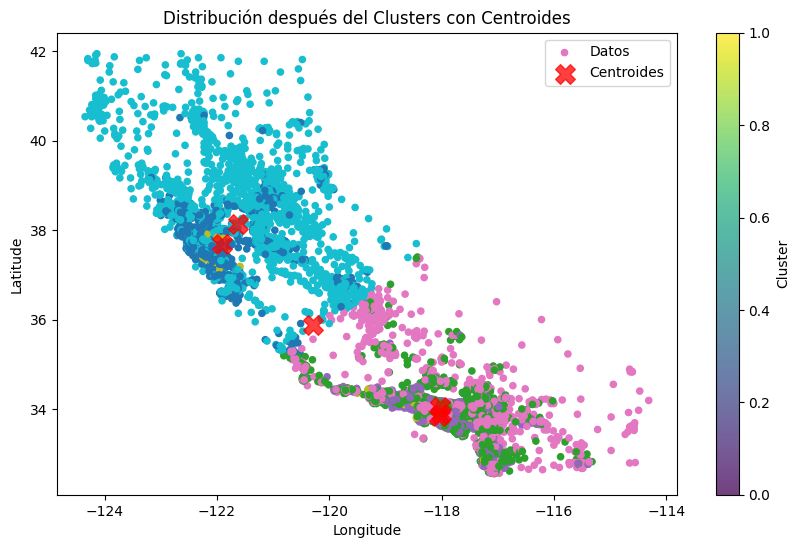

In [21]:
# Extraer los centroides
centroids = kmeans.cluster_centers_

# Visualizar los resultados con los centroides
plt.figure(figsize=(10, 6))
plt.scatter(X['Longitude'], X['Latitude'], c=X['cluster'], cmap='tab10', s=20, label='Datos')
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=200, alpha=0.75, marker='X', label='Centroides')
plt.colorbar(label='Cluster')
plt.title("Distribución después del Clusters con Centroides")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()
